In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
data = pd.read_csv("Audience composition example.csv", error_bad_lines=False)

b'Skipping line 118719: expected 13 fields, saw 52\n'
/Applications/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
data = data.loc[data["Unique Cookies with Impressions"].isnull() == False,:]

In [6]:
data = data.loc[:, ['Audience List', 'Audience List ID','Eligible Cookies on First-Party Audience List', 'Audience List.1',
       'Audience List ID.1', 'Audience List Type.1',
       'Audience List Cost (USD).1',
       'Eligible Cookies on Third-Party Audience List & Interest',
       'Match Ratio', 'Potential Impressions',
       'Unique Cookies with Impressions']]

In [7]:
data.columns = ['Fst_Name', 'Fst_ID', 'Fst_Size', 'Trd_Name',
       'Trd_ID', 'Trd_Type', 'Trd_Cost_USD', 'Trd_Size',
       'Match_Ratio', 'Potential_Impressions','Unique_Overlap']

In [8]:
#1. assuming population base
#2. 1st party eligible cookies / population base = threshold%
#3. 1 / threshold% = TP (minimum amount of 3rd party cookies required)
#4. filter out: Uniques cookies with impressions < threshold 
#5. sort it by match ratio 

---

In [9]:
#1. population assumption as base (important assumption as it affects how strigent the threshold is)
#below sets at 40 billions (Calculation shows 40 billion is what Google use to calculate match ratio)
pop = 40000000000
#2. 1st party eligible cookies / population base = threshold% = TP_Percentage
TP_Percentage = data.Fst_Size[0] / pop 
#3. 1 / threshold% = TP (minimum amount of 3rd party cookies required)
TP = 1 / TP_Percentage
print(TP_Percentage, TP)

4.0773475e-05 24525.7486638


---

In [10]:
#4. filter out: Uniques cookies with impressions < threshold 
#5. sort it by match ratio 
data = data.loc[data.Trd_Size > TP,:].sort_values("Match_Ratio",ascending=False).reset_index(drop=True)

---

In [11]:
#Below we do the top 50 and top 100 segments

In [12]:
output = data.loc[:, ['Trd_Name', 'Trd_ID', 'Trd_Type',
       'Trd_Cost_USD', 'Trd_Size', 'Match_Ratio', 'Potential_Impressions',
       'Unique_Overlap']]

In [13]:
output = output.loc[~output.Trd_Name.str.contains("Deleted"),:]
output = output.loc[output.Trd_Name.str[1:4] != "Old",:]

In [14]:
output_top50 = output.loc[:50, "Trd_Name"].sort_values(ascending=True).reset_index(drop=True)
output_top100 = output.loc[:100, "Trd_Name"].sort_values(ascending=True).reset_index(drop=True)

In [15]:
list1 = output.loc[:100, "Trd_Name"].sort_values(ascending=True).reset_index(drop=True)

In [16]:
i = 0
while i < len(list1):
    print(list1[i])
    i = i + 1

Acxiom UK » Automotive » Car SMMT code » E+ (Executive/Luxury/Sport)
Acxiom UK » Automotive » Likely Age of Car » 0-3 years
Acxiom UK » Automotive » Purchase Behaviour » Tends to buy Car under 3 years old
Acxiom UK » Debt/Credit » Cards » 3+ Credit Cards
Acxiom UK » Debt/Credit » Cards » Have American Express/Diners Club card
Acxiom UK » Demographics & Lifestage » Age » 50-54 years
Acxiom UK » Demographics & Lifestage » Age » 55-59 years
Acxiom UK » Demographics & Lifestage » Children » 2 Children
Acxiom UK » Demographics & Lifestage » Lifestage » 3: Older Couples (35-54)
Acxiom UK » Economic Wellbeing/Income » Annual Household Income » 7: £75,000+
Acxiom UK » Economic Wellbeing/Income » Employment Status » 2: Company Director
Acxiom UK » Economic Wellbeing/Income » High Affluence (top 30%)
Acxiom UK » Economic Wellbeing/Income » Occupation » 7: Professional/Senior Management
Acxiom UK » Geography » Region » East Anglia
Acxiom UK » Home & Property » Home Owner Maturity » Likely to be m

In [17]:
output[(output.Trd_Name.str.contains("BlueKai")) & (output.Trd_Type == 'Bid Manager Audiences')]

,Trd_Name,Trd_ID,Trd_Type,Trd_Cost_USD,Trd_Size,Match_Ratio,Potential_Impressions,Unique_Overlap


In [74]:
output[(output.Trd_Name.str.contains("In-Market")) & (output.Trd_Name.str.contains("Bid Manager"))].sort_values("Match_Ratio", ascending=False)

,Trd_Name,Trd_ID,Trd_Type,Trd_Cost_USD,Trd_Size,Match_Ratio,Potential_Impressions,Unique_Overlap
11479,Bid Manager Audiences » In-Market Categories »...,4576009.0,Bid Manager Audiences,0.0,1.246211e+08,38.998976,79398592,607494
12403,Bid Manager Audiences » In-Market Categories »...,4575049.0,Bid Manager Audiences,0.0,1.703233e+07,31.413180,8658003,66878
13425,Bid Manager Audiences » In-Market Categories »...,4530529.0,Bid Manager Audiences,0.0,5.092577e+06,24.276039,346013,15453
14278,Bid Manager Audiences » In-Market Categories »...,4529449.0,Bid Manager Audiences,0.0,1.770147e+07,20.336083,253159,44996
14317,Bid Manager Audiences » In-Market Categories »...,4575529.0,Bid Manager Audiences,0.0,8.843424e+07,20.213574,4702907,223440
14512,Bid Manager Audiences » In-Market Categories »...,4529569.0,Bid Manager Audiences,0.0,3.520124e+07,19.552153,866729,86030
14527,Bid Manager Audiences » In-Market Categories »...,4529689.0,Bid Manager Audiences,0.0,3.341052e+07,19.493110,886409,81407
15462,Bid Manager Audiences » In-Market Categories »...,4488529.0,Bid Manager Audiences,0.0,1.214240e+08,16.691421,55079008,253335
15507,Bid Manager Audiences » In-Market Categories »...,4481929.0,Bid Manager Audiences,0.0,9.167654e+07,16.571004,30342570,189891
15932,Bid Manager Audiences » In-Market Categories »...,4530169.0,Bid Manager Audiences,0.0,6.488189e+06,15.579531,139215,12635


---

In [19]:
#Below we do the standard demo/age segments

In [20]:
match = pd.read_csv("segment_match_table.csv", error_bad_lines=False)

In [21]:
#Have chosen Axciom for its relatively strong reach and higher match ratio generally speaking
#Axciom age data 
output_age = output.loc[output.Trd_ID.isin([413303512, 413303575, 413682608, 413302702, 
                               415218099, 413302699, 415218093, 413303584, 415218102, 
                               413303578, 413303581, 415218096]),:].sort_values("Trd_Name", ascending=True).reset_index(drop=True)

In [22]:
output_age = output_age.merge(match[["Trd_ID", "Map_Name"]], on="Trd_ID", how="left")
output_age = output_age.loc[:, ["Map_Name", "Match_Ratio"]]

In [23]:
output_age["Index"] = output_age.Match_Ratio / (np.sum(output_age.Match_Ratio) / len(output_age.Match_Ratio)) * 100

In [37]:
pal = sns.color_palette(palette="Blues", n_colors=1)

In [49]:
np.max(output_age["Index"])

126.73652908964851

In [58]:
age_plot

[(0, 139.41018199861338),

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

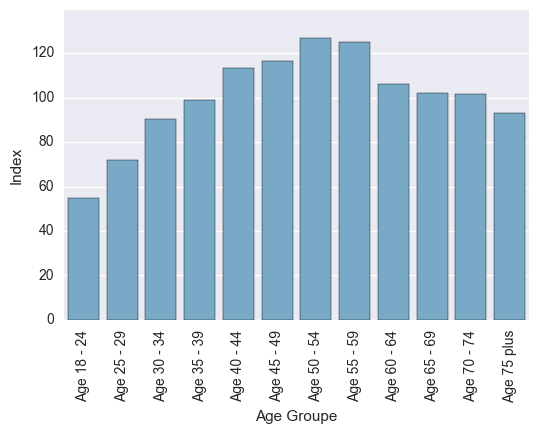

In [68]:
age_plot = sns.barplot(data=output_age, x="Map_Name", y="Index", palette=pal)
age_plot = age_plot.set(ylim=[0, np.max(output_age["Index"])*1.1], xlabel="Age Groupe", ylabel="Index")
plt.xticks(rotation=90)

In [44]:
len(output.Trd_Name[(output.Trd_Name.str.contains("Bid Manager"))])

598

In [46]:
i=0
while i<len(output.Trd_Name[(output.Trd_Name.str.contains("Finance"))]):
    print(output.Trd_Name[output.Trd_Name.str.contains("Affinity")])
    i = i+1

88        Bluekai - Branded Data » On Audience » Intent ...
89        Bluekai - Branded Data » On Audience » Interes...
128       Eyeota - ShareThis - EMEA » Finance » Accounti...
132       Audiences by Skimlinks » Wants to Buy » Person...
202       OnAudience » Interest » Personal Finance » Ins...
302       Eyeota - ShareThis - EMEA » Finance » Credit a...
316       Eyeota - ShareThis - EMEA » Finance » Banking ...
360               OnAudience » Intent » Finance » Insurance
381       Lotame - AN Media » Syndicate » Tier 2 » Finan...
383       eXelate » ShareThis » UK » Finance » Insurance...
476       VisualDNA - UK  Personality: » Finances » Affl...
523       Eyeota - ShareThis - EMEA » Finance » Financia...
581       Lotame - AN Media » Syndicate » MailOnline - T...
597       Eyeota - ShareThis - EMEA » Finance » Insuranc...
624       eXelate » Bombora » B2B » Functional Area » Fi...
649       VisualDNA - CallCredit - UK » Finance » Househ...
666       VisualDNA - CallCredit - UK » 

KeyboardInterrupt: 

In [78]:
output[output.Unique_Overlap != "< 1000"].sort_values("Match_Ratio", ascending=False)

,Trd_Name,Trd_ID,Trd_Type,Trd_Cost_USD,Trd_Size,Match_Ratio,Potential_Impressions,Unique_Overlap
0,LiveRamp Data Store » GBG Transactis » UK » In...,510273994.0,Third Party,2.000000,25852.0,490.189116,1780040,1584
1,Eyeota - ShareThis - EMEA » Business and Indus...,445273728.0,Third Party,0.950000,108722.0,440.549243,11052670,5987
2,Eyeota - ShareThis - EMEA » Hobbies and Leisur...,445274133.0,Third Party,0.950000,65107.0,427.370487,3995469,3478
3,Acxiom UK » Personicx Consumer Segments » 23: ...,414303267.0,Third Party,0.800000,420865.0,420.954841,35599436,22145
4,AddThis - UK » In-Market » Financial » Insuran...,385919779.0,Third Party,0.500000,305344.0,419.892756,48065656,16026
5,Eyeota - ShareThis - EMEA » Autos and Vehicles...,445273590.0,Third Party,0.950000,182671.0,416.454803,26421420,9509
6,Acxiom UK » Personicx Consumer Segments » 36: ...,412396279.0,Third Party,0.800000,279563.0,409.479558,24943454,14309
7,Eyeota - ShareThis - EMEA » Home and Garden » ...,445274139.0,Third Party,0.950000,129492.0,405.287804,17650530,6560
8,Acxiom UK » Personicx Consumer Segments » 38: ...,412870166.0,Third Party,0.800000,430650.0,386.050950,55807576,20781
10,Eyeota - ShareThis - EMEA » Autos and Vehicles...,445273581.0,Third Party,0.950000,114335.0,375.818877,15203294,5371
